## XGBM and LGBM 

In [268]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

In [270]:
import warnings
warnings.filterwarnings('ignore')

In [272]:
## Load your train and test datasets

In [274]:
train_data=pd.read_csv('Titanic_train[1].csv')

In [276]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [278]:
test_data=pd.read_csv('Titanic_test[1].csv')

In [280]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [282]:
# Get information about the data types and missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [284]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [286]:
# Get summary statistics of numerical features
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [288]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [290]:
train_data.size

10692

In [292]:
train_data.shape

(891, 12)

In [294]:
test_data.size

4598

In [296]:
test_data.shape

(418, 11)

In [302]:
# Check for missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [304]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [306]:
# Data Preprocessing

In [308]:
## handling missing values

In [310]:
# find mean to replace missing values in Age column
meanage_train=train_data['Age'].mean()
meanage_train

29.69911764705882

In [312]:
meanage_test=test_data['Age'].mean()
meanage_test

30.272590361445783

In [314]:
# Fill missing Age with mean value
train_data.fillna({'Age':meanage_train}, inplace=True)
test_data.fillna({'Age':meanage_test}, inplace=True)

In [316]:
# Fill missing Embarked with the most common value
train_data.fillna(train_data['Embarked'].mode()[0], inplace=True)

In [318]:
# Fill missing cabin with the most common value
test_data.fillna(test_data['Cabin'].mode()[0], inplace=True)

In [320]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [322]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [324]:
# Check if there are any non-numeric values in 'Fare'
print(test_data['Fare'].unique())

[7.8292 7.0 9.6875 8.6625 12.2875 9.225 7.6292 29.0 7.2292 24.15 7.8958
 26.0 82.2667 61.175 27.7208 12.35 7.225 7.925 59.4 3.1708 31.6833 61.3792
 262.375 14.5 61.9792 30.5 21.6792 31.5 20.575 23.45 57.75 8.05 9.5
 56.4958 13.4167 26.55 7.85 13.0 52.5542 29.7 7.75 76.2917 15.9 60.0
 15.0333 23.0 263.0 15.5792 29.125 7.65 16.1 13.5 7.725 21.0 7.8792 42.4
 28.5375 211.5 25.7 15.2458 221.7792 10.7083 14.4542 13.9 7.775 52.0
 7.7958 78.85 7.8542 55.4417 8.5167 22.525 7.8208 8.7125 15.0458 7.7792
 31.6792 7.2833 6.4375 16.7 75.2417 15.75 7.25 23.25 28.5 25.4667 46.9
 151.55 18.0 51.8625 83.1583 'B57 B59 B63 B66' 12.1833 31.3875 7.55 13.775
 7.7333 22.025 50.4958 34.375 8.9625 39.0 36.75 53.1 247.5208 16.0 69.55
 32.5 134.5 10.5 8.1125 15.5 14.4 227.525 25.7417 7.05 73.5 42.5 164.8667
 13.8583 27.4458 15.1 65.0 6.4958 71.2833 75.25 106.425 30.0 7.8875 27.75
 136.7792 9.325 17.4 12.7375 0.0 20.2125 39.6 6.95 81.8583 41.5792 45.5
 9.35 93.5 14.1083 7.575 135.6333 146.5208 211.3375 79.2 15.741

In [326]:
# Convert 'Fare' to numeric, forcing errors to NaN
test_data['Fare'] = pd.to_numeric(test_data['Fare'], errors='coerce')

In [328]:
# Fill any NaNs in 'Fare' with the median of the column
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

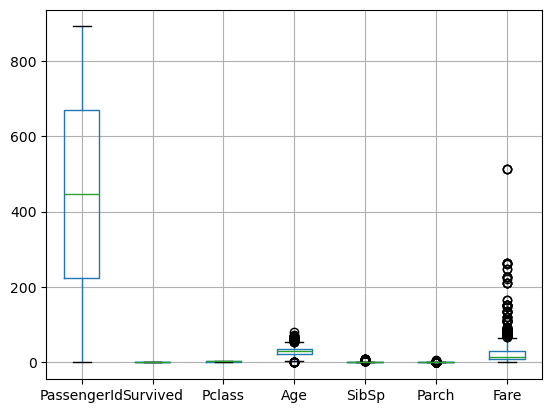

In [330]:
train_data.boxplot()
plt.show()

In [332]:
test_data.boxplot()

<Axes: >

In [334]:
Q1a= train_data['Age'].quantile(0.25)
Q3a=train_data['Age'].quantile(0.75)
IQRa=Q3a-Q1a
print(Q1a,Q3a,IQRa)

22.0 35.0 13.0


In [336]:
lower_extremea=Q1a-1.5*IQRa
upper_extremea=Q3a+1.5*IQRa
print(lower_extremea,upper_extremea)

2.5 54.5


In [338]:
train_data_a_outliers= train_data[(train_data['Age']<lower_extremea) | (train_data['Age']>upper_extremea)]
train_data_a_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,S,S
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,S,Q
33,34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,S,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,B28,S
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S,S
851,852,0,3,"Svensson, Mr. Johan",male,74.00,0,0,347060,7.7750,S,S


In [340]:
train_data_a_no_outliers= train_data[(train_data['Age']>=lower_extremea) & (train_data['Age']<=upper_extremea)]
train_data_a_no_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


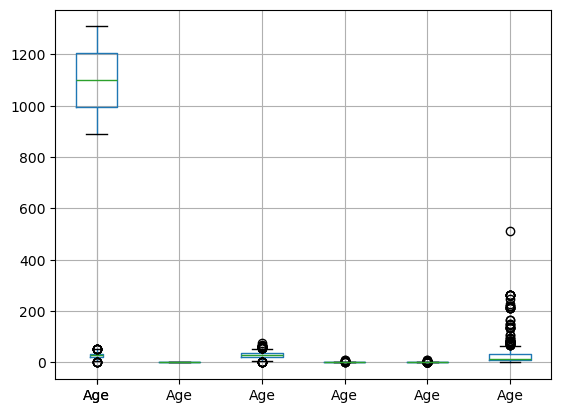

In [342]:
train_data_a_no_outliers.boxplot('Age')
plt.show()

In [344]:
Q1s= train_data['SibSp'].quantile(0.25)
Q3s=train_data['SibSp'].quantile(0.75)
IQRs=Q3s-Q1s
print(Q1s,Q3s,IQRs)

0.0 1.0 1.0


In [76]:
lower_extremes=Q1s-1.5*IQRs
upper_extremes=Q3s+1.5*IQRs
print(lower_extremes,upper_extremes)

-1.5 2.5


In [78]:
train_data_s_outliers= train_data[(train_data['SibSp']<lower_extremes) | (train_data['SibSp']>upper_extremes)]
train_data_s_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,S
16,17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,S,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.000000,3,1,349909,21.0750,S,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.000000,4,1,3101295,39.6875,S,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,CA 2144,46.9000,S,S
63,64,0,3,"Skoog, Master. Harald",male,4.000000,3,2,347088,27.9000,S,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.000000,4,2,3101281,7.9250,S,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,CA 2144,46.9000,S,S
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.000000,3,0,3101278,15.8500,S,S


In [80]:
train_data_s_no_outliers= train_data[(train_data['SibSp']>=lower_extremes) & (train_data['SibSp']<=upper_extremes)]
train_data_s_no_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


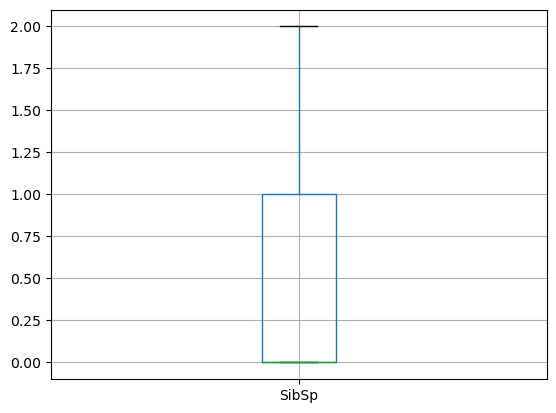

In [82]:
train_data_s_no_outliers.boxplot('SibSp')
plt.show()

In [84]:
Q1p= train_data['Parch'].quantile(0.25)
Q3p=train_data['Parch'].quantile(0.75)
IQRp=Q3p-Q1p
print(Q1p,Q3p,IQRp)

0.0 0.0 0.0


In [86]:
lower_extremep=Q1p-1.5*IQRp
upper_extremep=Q3p+1.5*IQRp
print(lower_extremep,upper_extremep)

0.0 0.0


In [88]:
train_data_p_outliers= train_data[(train_data['Parch']<lower_extremep) | (train_data['Parch']>upper_extremep)]
train_data_p_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.000000,1,1,PP 9549,16.7000,G6,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.2750,S,S
16,17,0,3,"Rice, Master. Eugene",male,2.000000,4,1,382652,29.1250,S,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.000000,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.000000,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.000000,0,1,230433,26.0000,S,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,S,Q


In [90]:
train_data_p_no_outliers= train_data[(train_data['Parch']>=lower_extremep) & (train_data['Parch']<=upper_extremep)]
train_data_p_no_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,S,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


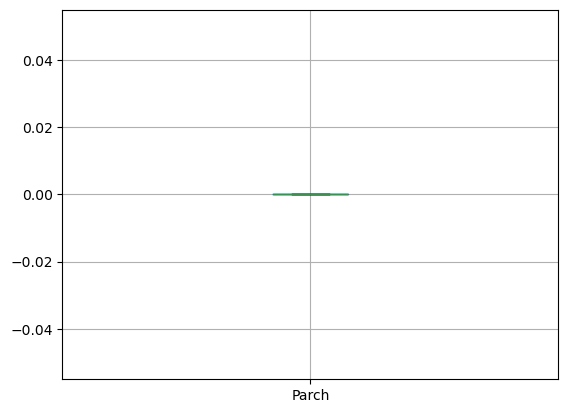

In [92]:
train_data_p_no_outliers.boxplot('Parch')
plt.show()

In [94]:
Q1f= train_data['Fare'].quantile(0.25)
Q3f=train_data['Fare'].quantile(0.75)
IQRf=Q3f-Q1f
print(Q1f,Q3f,IQRf)

7.9104 31.0 23.0896


In [96]:
lower_extremef=Q1f-1.5*IQRf
upper_extremef=Q3f+1.5*IQRf
print(lower_extremef,upper_extremef)

-26.724 65.6344


In [98]:
train_data_f_outliers= train_data[(train_data['Fare']<lower_extremef) | (train_data['Fare']>upper_extremef)]
train_data_f_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,S,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,D33,C
...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C92,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S,S


In [100]:
train_data_f_no_outliers= train_data[(train_data['Fare']>=lower_extremef) & (train_data['Fare']<=upper_extremef)]
train_data_f_no_outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,S,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


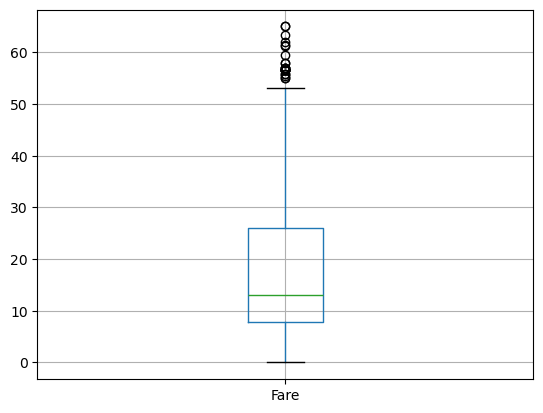

In [102]:
train_data_f_no_outliers.boxplot('Fare')
plt.show()

In [104]:
Q1A= test_data['Age'].quantile(0.25)
Q3A=test_data['Age'].quantile(0.75)
IQRA=Q3A-Q1A
print(Q1A,Q3A,IQRA)

23.0 35.75 12.75


In [106]:
lower_extremeA=Q1A-1.5*IQRA
upper_extremeA=Q3A+1.5*IQRA
print(lower_extremeA,upper_extremeA)

3.875 54.875


In [108]:
test_data_A_outliers= test_data[(test_data['Age']<lower_extremeA) | (test_data['Age']>upper_extremeA)]
test_data_A_outliers

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,B57 B59 B63 B66,Q
13,905,2,"Howard, Mr. Benjamin",male,63.00,1,0,24065,26.0000,B57 B59 B63 B66,S
20,912,1,"Rothschild, Mr. Martin",male,55.00,1,0,PC 17603,59.4000,B57 B59 B63 B66,C
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.00,0,0,11813,76.2917,D15,C
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.00,1,4,19950,263.0000,C23 C25 C27,S
77,969,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.00,2,0,11770,25.7000,C101,S
81,973,1,"Straus, Mr. Isidor",male,67.00,1,0,PC 17483,221.7792,C55 C57,S
89,981,2,"Wells, Master. Ralph Lester",male,2.00,1,1,29103,23.0000,B57 B59 B63 B66,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.00,1,0,19877,78.8500,C46,S
114,1006,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.00,1,0,PC 17483,221.7792,C55 C57,S


In [110]:
test_data_A_no_outliers= test_data[(test_data['Age']>=lower_extremeA) & (test_data['Age']<=upper_extremeA)]
test_data_A_no_outliers

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00000,0,0,7538,9.2250,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


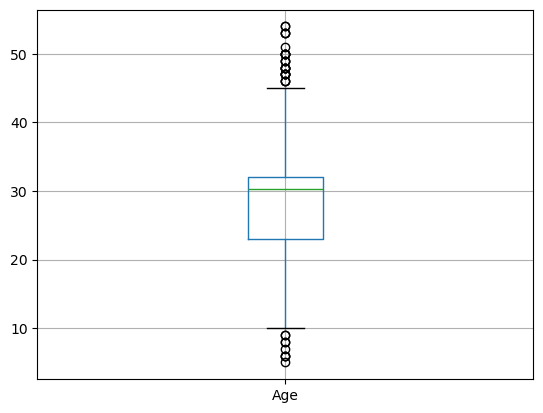

In [112]:
test_data_A_no_outliers.boxplot('Age')
plt.show()

In [114]:
Q1S= test_data['SibSp'].quantile(0.25)
Q3S=test_data['SibSp'].quantile(0.75)
IQRS=Q3S-Q1S
print(Q1S,Q3S,IQRS)

0.0 1.0 1.0


In [116]:
lower_extremeS=Q1S-1.5*IQRS
upper_extremeS=Q3S+1.5*IQRS
print(lower_extremeS,upper_extremeS)

-1.5 2.5


In [346]:
test_data_S_outliers= test_data[(test_data['SibSp']<lower_extremeS) | (test_data['SibSp']>upper_extremeS)]
test_data_S_outliers

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
53,945,1,"Fortune, Miss. Ethel Flora",female,28.00000,3,2,19950,263.0000,C23 C25 C27,S
55,947,3,"Rice, Master. Albert",male,10.00000,4,1,382652,29.1250,B57 B59 B63 B66,Q
140,1032,3,"Goodwin, Miss. Jessie Allis",female,10.00000,5,2,CA 2144,46.9000,B57 B59 B63 B66,S
145,1037,3,"Vander Planke, Mr. Julius",male,31.00000,3,0,345763,18.0000,B57 B59 B63 B66,S
154,1046,3,"Asplund, Master. Filip Oscar",male,13.00000,4,2,347077,31.3875,B57 B59 B63 B66,S
188,1080,3,"Sage, Miss. Ada",female,30.27259,8,2,CA. 2343,69.5500,B57 B59 B63 B66,S
214,1106,3,"Andersson, Miss. Ida Augusta Margareta",female,38.00000,4,2,347091,7.7750,B57 B59 B63 B66,S
360,1252,3,"Sage, Master. William Henry",male,14.50000,8,2,CA. 2343,69.5500,B57 B59 B63 B66,S
379,1271,3,"Asplund, Master. Carl Edgar",male,5.00000,4,2,347077,31.3875,B57 B59 B63 B66,S
389,1281,3,"Palsson, Master. Paul Folke",male,6.00000,3,1,349909,21.0750,B57 B59 B63 B66,S


In [348]:
test_data_S_no_outliers= test_data[(test_data['SibSp']>=lower_extremeS) & (test_data['SibSp']<=upper_extremeS)]
test_data_S_no_outliers

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


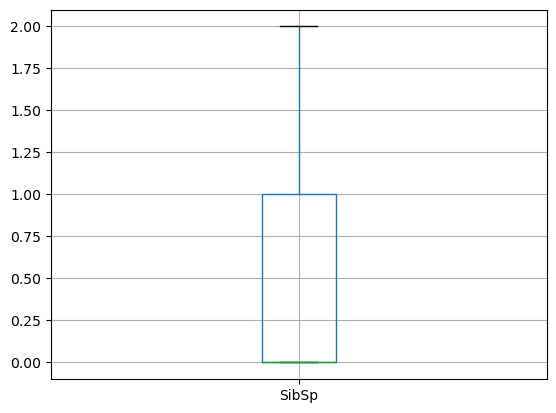

In [350]:
test_data_S_no_outliers.boxplot('SibSp')
plt.show()

In [352]:
Q1P= test_data['Parch'].quantile(0.25)
Q3P=test_data['Parch'].quantile(0.75)
IQRP=Q3P-Q1P
print(Q1P,Q3P,IQRP)

0.0 0.0 0.0


In [354]:
lower_extremeP=Q1P-1.5*IQRP
upper_extremeP=Q3P+1.5*IQRP
print(lower_extremeP,upper_extremeP)

0.0 0.0


In [356]:
test_data_P_outliers= test_data[(test_data['Parch']<lower_extremeP) | (test_data['Parch']>upper_extremeP)]
test_data_P_outliers

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00000,1,1,248738,29.0000,B57 B59 B63 B66,S
21,913,3,"Olsen, Master. Artur Karl",male,9.00000,0,1,C 17368,3.1708,B57 B59 B63 B66,S
23,915,1,"Williams, Mr. Richard Norris II",male,21.00000,0,1,PC 17597,61.3792,B57 B59 B63 B66,C
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.00000,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
...,...,...,...,...,...,...,...,...,...,...,...
397,1289,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48.00000,1,1,13567,79.2000,B41,C
402,1294,1,"Gibson, Miss. Dorothy Winifred",female,22.00000,0,1,112378,59.4000,B57 B59 B63 B66,C
407,1299,1,"Widener, Mr. George Dunton",male,50.00000,1,1,113503,211.5000,C80,C
409,1301,3,"Peacock, Miss. Treasteall",female,3.00000,1,1,SOTON/O.Q. 3101315,13.7750,B57 B59 B63 B66,S


In [358]:
test_data_P_no_outliers= test_data[(test_data['Parch']>=lower_extremeP) & (test_data['Parch']<=upper_extremeP)]
test_data_P_no_outliers

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00000,0,0,7538,9.2250,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.00000,0,0,347086,7.7750,B57 B59 B63 B66,S
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S


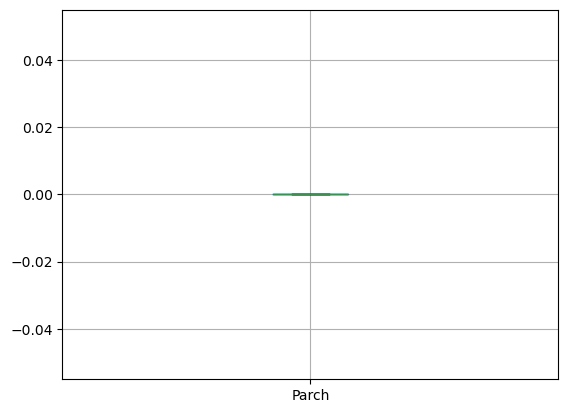

In [360]:
test_data_P_no_outliers.boxplot('Parch')
plt.show()

In [362]:
Q1F= test_data['Fare'].quantile(0.25)
Q3F=test_data['Fare'].quantile(0.75)
IQRF=Q3F-Q1F
print(Q1F,Q3F,IQRF)

7.8958 31.471875 23.576075


In [364]:
lower_extremeF=Q1F-1.5*IQRF
upper_extremeF=Q3F+1.5*IQRF
print(lower_extremeF,upper_extremeF)

-27.468312499999996 66.8359875


In [366]:
test_data_F_outliers= test_data[(test_data['Fare']<lower_extremeF) | (test_data['Fare']>upper_extremeF)]
test_data_F_outliers

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.00000,1,0,21228,82.2667,B45,S
24,916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.00000,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
48,940,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.00000,0,0,11813,76.2917,D15,C
53,945,1,"Fortune, Miss. Ethel Flora",female,28.00000,3,2,19950,263.0000,C23 C25 C27,S
59,951,1,"Chaudanson, Miss. Victorine",female,36.00000,0,0,PC 17608,262.3750,B61,C
64,956,1,"Ryerson, Master. John Borie",male,13.00000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
69,961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.00000,1,4,19950,263.0000,C23 C25 C27,S
74,966,1,"Geiger, Miss. Amalie",female,35.00000,0,0,113503,211.5000,C130,C
75,967,1,"Keeping, Mr. Edwin",male,32.50000,0,0,113503,211.5000,C132,C
81,973,1,"Straus, Mr. Isidor",male,67.00000,1,0,PC 17483,221.7792,C55 C57,S


In [368]:
test_data_F_no_outliers= test_data[(test_data['Fare']>=lower_extremeF) & (test_data['Fare']<=upper_extremeF)]
test_data_F_no_outliers

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.00000,0,0,347086,7.7750,B57 B59 B63 B66,S
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


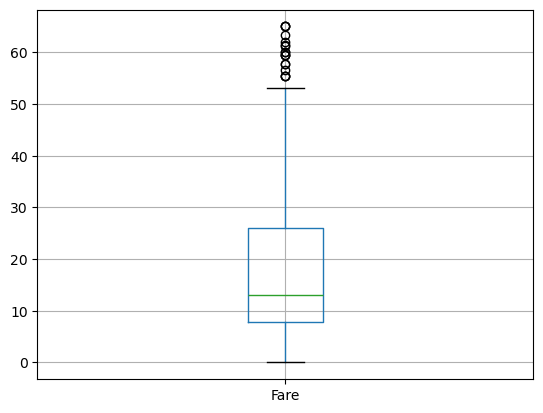

In [370]:
test_data_F_no_outliers.boxplot('Fare')
plt.show()

In [372]:
# Histogram of Training data

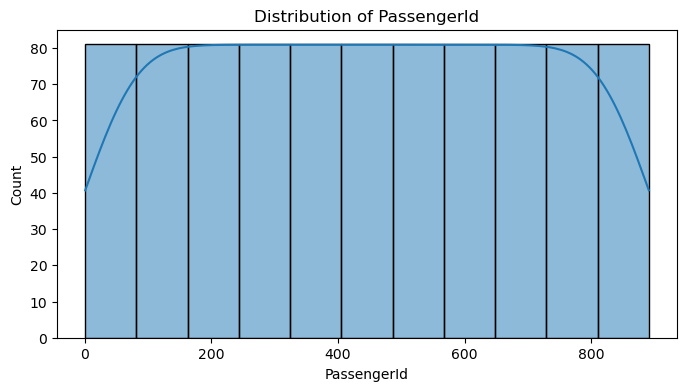

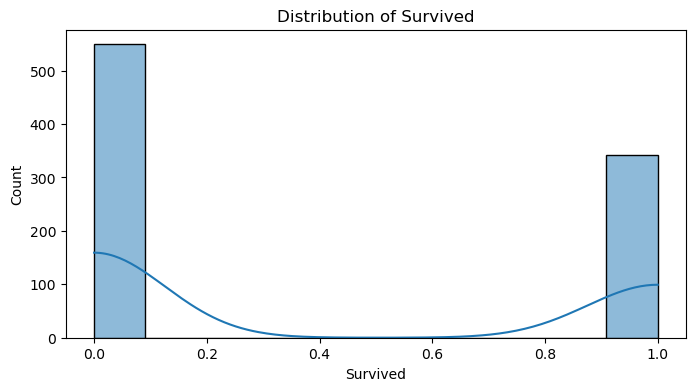

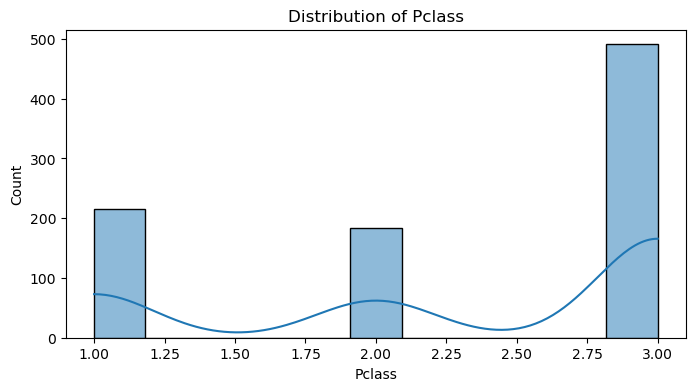

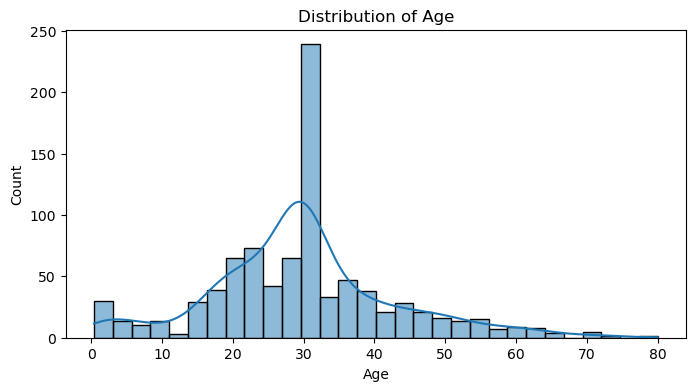

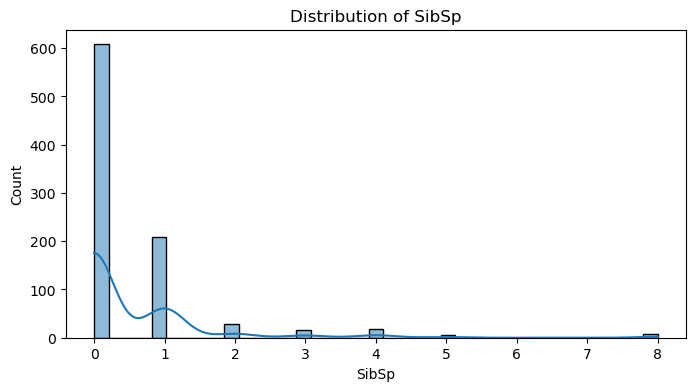

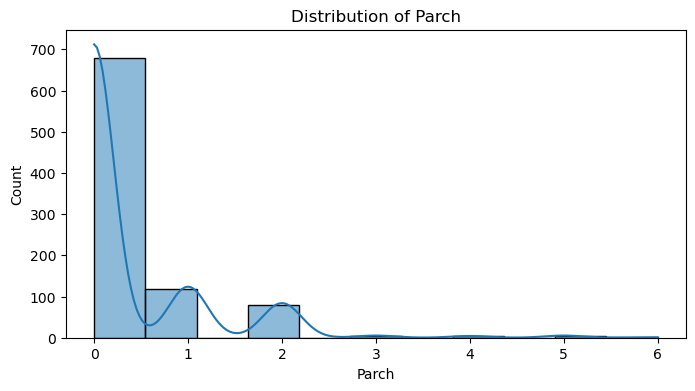

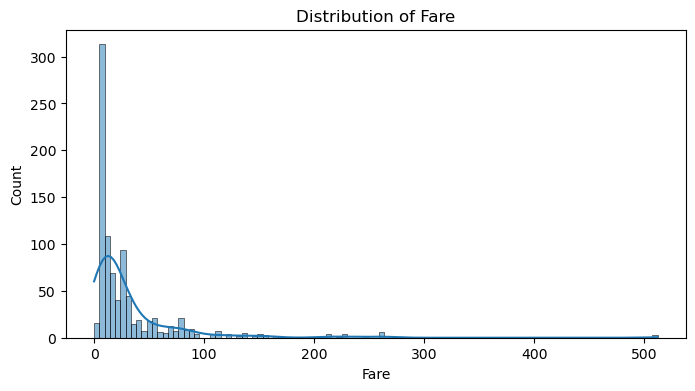

In [374]:
for column in train_data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8,4))
    sns.histplot(train_data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [375]:
# Histogram of testing data

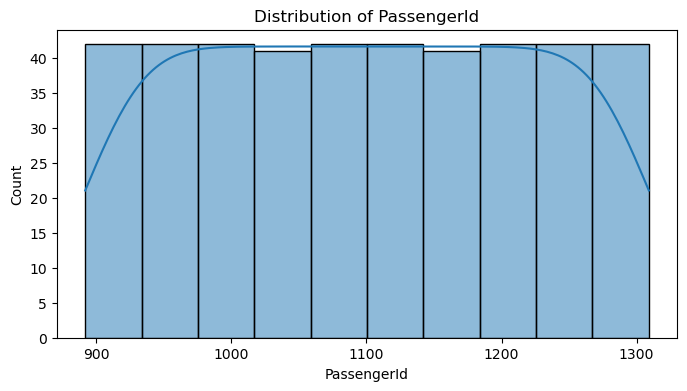

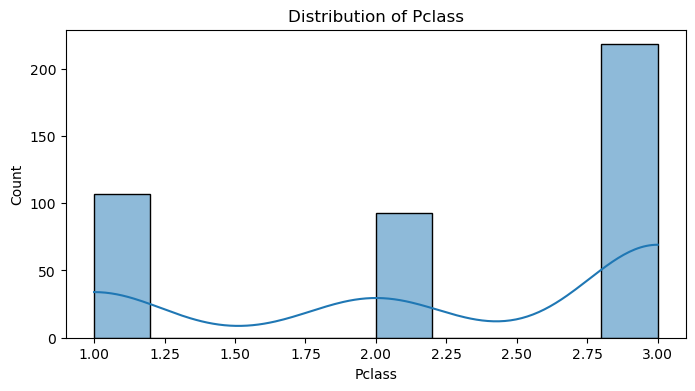

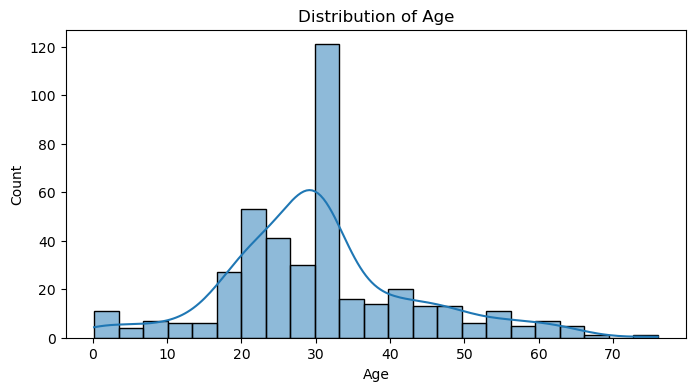

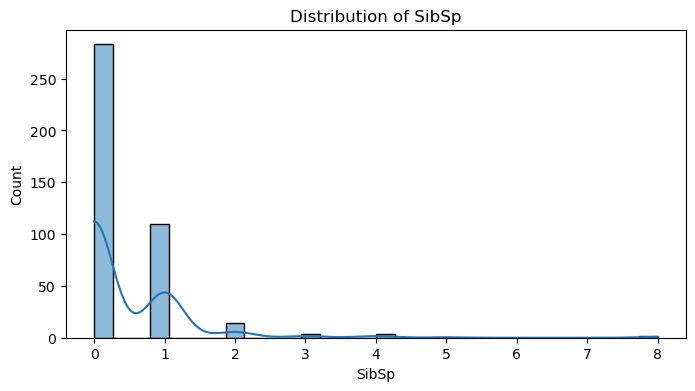

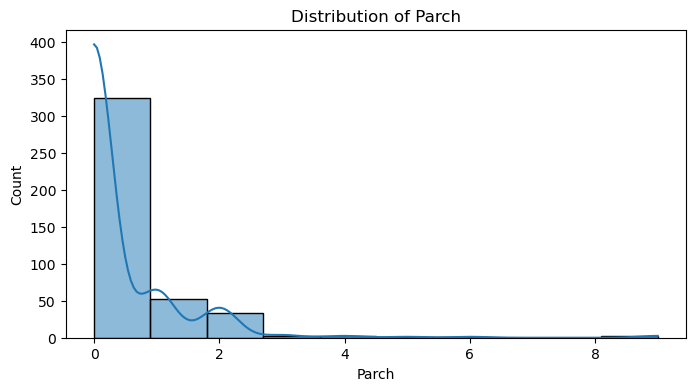

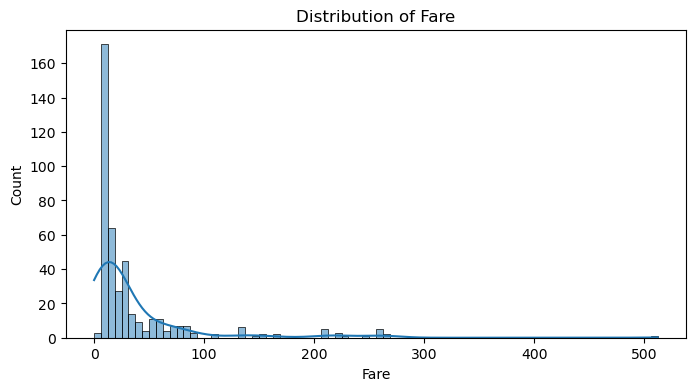

In [378]:
for column in test_data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(test_data[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

In [379]:
num_col1= [i for i in train_data.columns if train_data[i].dtype!='O']
num_col1

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [380]:
cat_col1= [i for i in train_data.columns if train_data[i].dtype=='O']
cat_col1

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [384]:
corr1=train_data[num_col1].corr()
corr1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [386]:
range(len(corr1.columns))

range(0, 7)

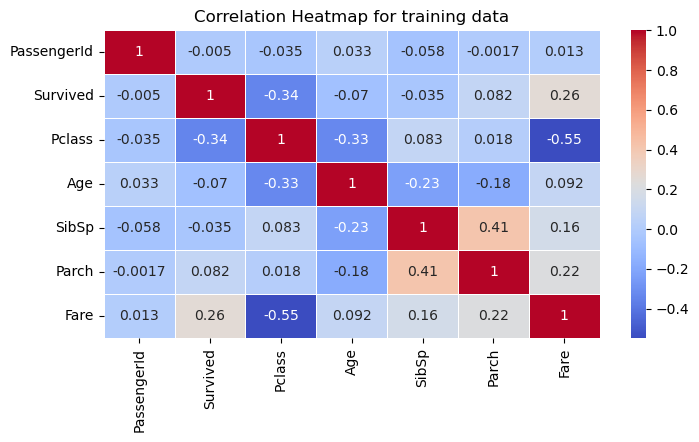

In [388]:
# correlation heatmap for training data
plt.figure(figsize=(8,4))
sns.heatmap(train_data[num_col1].corr(),annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Heatmap for training data')
plt.show()

In [389]:
high_corr1 = corr1[abs(corr1) > 0.5]
high_corr1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Survived,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Pclass,NaN,NaN,1.0000,NaN,NaN,NaN,-0.5495
Age,NaN,NaN,NaN,1.0,NaN,NaN,NaN
SibSp,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Parch,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Fare,NaN,NaN,-0.5495,NaN,NaN,NaN,1.0000


In [392]:
num_col2= [i for i in test_data.columns if test_data[i].dtype!='O']
num_col2

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [394]:
cat_col2= [i for i in test_data.columns if test_data[i].dtype=='O']
cat_col2

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [396]:
corr2=test_data[num_col2].corr()
corr2

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.030874,0.003818,0.043080,0.008633
Pclass,-0.026751,1.000000,-0.440782,0.001087,0.018721,-0.577313
Age,-0.030874,-0.440782,1.000000,-0.079535,-0.045073,0.324568
SibSp,0.003818,0.001087,-0.079535,1.000000,0.306895,0.171912
Parch,0.043080,0.018721,-0.045073,0.306895,1.000000,0.230325
Fare,0.008633,-0.577313,0.324568,0.171912,0.230325,1.000000


In [398]:
range(len(corr2.columns))

range(0, 6)

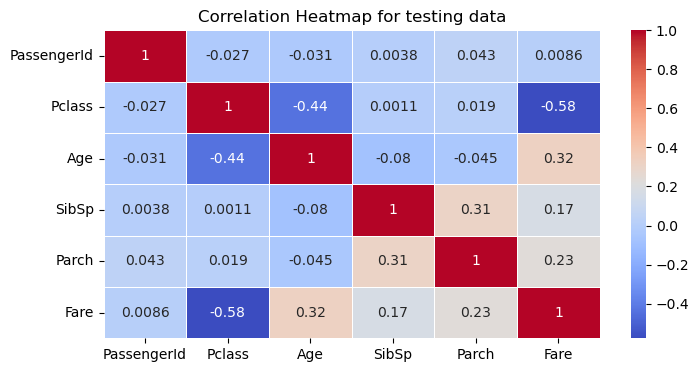

In [400]:
# correlation heatmap for testing data
plt.figure(figsize=(8,4))
sns.heatmap(test_data[num_col2].corr(),annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('Correlation Heatmap for testing data')
plt.show()

In [402]:
high_corr2 = corr2[abs(corr2) > 0.5]
high_corr2

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.0,NaN,NaN,NaN,NaN,NaN
Pclass,NaN,1.000000,NaN,NaN,NaN,-0.577313
Age,NaN,NaN,1.0,NaN,NaN,NaN
SibSp,NaN,NaN,NaN,1.0,NaN,NaN
Parch,NaN,NaN,NaN,NaN,1.0,NaN
Fare,NaN,-0.577313,NaN,NaN,NaN,1.000000


In [404]:
# Select a subset of features for pair plot
feat= ['Survived','Pclass', 'Age', 'Fare', 'SibSp', 'Parch']

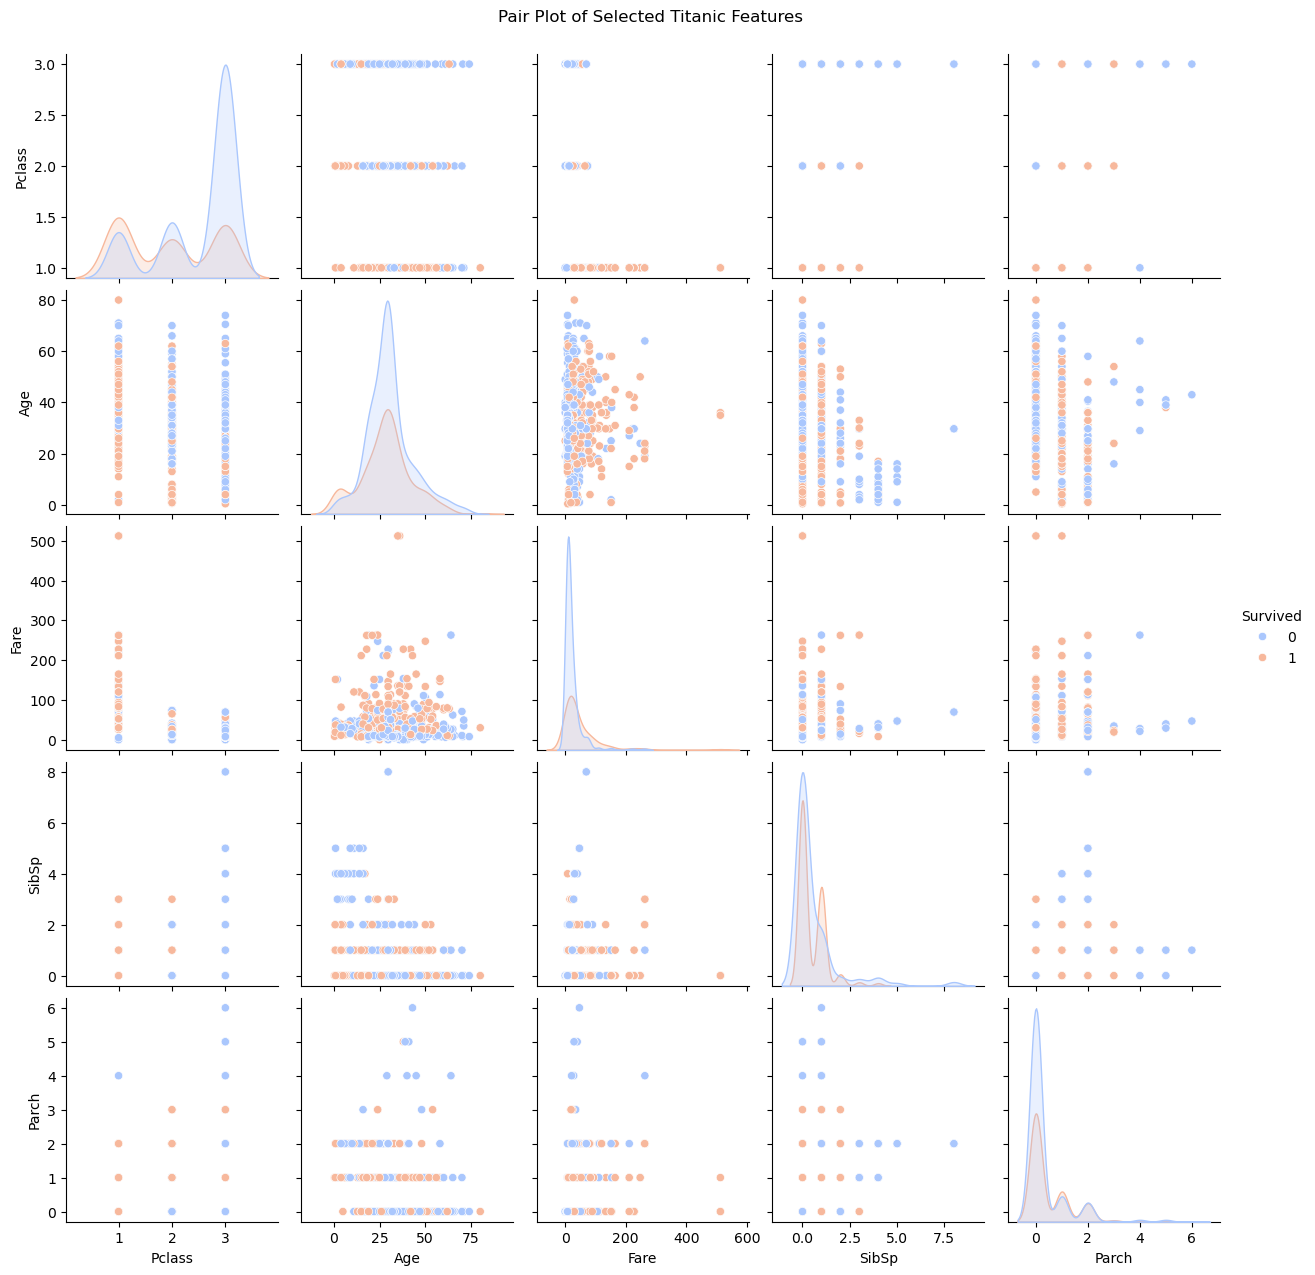

In [406]:
sns.pairplot(train_data[feat],hue='Survived', palette='coolwarm', diag_kind='kde')
plt.suptitle("Pair Plot of Selected Titanic Features", y=1.02)
plt.show()

In [407]:
# remove cols not useful for training
train_data.drop(columns=['Cabin','Name','PassengerId','Ticket','Fare'],inplace=True)

In [408]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.000000,1,0,S
1,1,1,female,38.000000,1,0,C
2,1,3,female,26.000000,0,0,S
3,1,1,female,35.000000,1,0,S
4,0,3,male,35.000000,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,S
887,1,1,female,19.000000,0,0,S
888,0,3,female,29.699118,1,2,S
889,1,1,male,26.000000,0,0,C


In [409]:
# Encode categorical variables using OneHotEncoder

In [410]:
from sklearn.preprocessing import OneHotEncoder

In [411]:
one_hot = OneHotEncoder()

In [412]:
# for training data set
df1 = pd.DataFrame(one_hot.fit_transform(train_data[['Sex','Embarked']]).toarray())

In [413]:
df1

,0,1,2,3,4
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,1.0
888,1.0,0.0,0.0,0.0,1.0
889,0.0,1.0,1.0,0.0,0.0


In [414]:
train_data=train_data.join(df1)

In [415]:
train_data.drop((['Sex','Embarked']),axis=1,inplace=True)

In [416]:
train_data=train_data.rename(columns={0:'Sex_Female',1:'Sex_Male',2:'Embarked_C',3:'Embarked_Q',4:'Embarked_S'})

In [417]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Sex_Female,Sex_Male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.000000,1,0,1.0,0.0,1.0,0.0,0.0
2,1,3,26.000000,0,0,1.0,0.0,0.0,0.0,1.0
3,1,1,35.000000,1,0,1.0,0.0,0.0,0.0,1.0
4,0,3,35.000000,0,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,0.0,1.0,0.0,0.0,1.0
887,1,1,19.000000,0,0,1.0,0.0,0.0,0.0,1.0
888,0,3,29.699118,1,2,1.0,0.0,0.0,0.0,1.0
889,1,1,26.000000,0,0,0.0,1.0,1.0,0.0,0.0


In [418]:
# remove cols not useful for testing
test_data.drop(columns=['Cabin','Name','PassengerId','Ticket','Fare'],inplace=True)

In [419]:
# for testing data set
df2 = pd.DataFrame(one_hot.fit_transform(test_data[['Sex','Embarked']]).toarray())

In [420]:
df2

,0,1,2,3,4
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0
414,1.0,0.0,1.0,0.0,0.0
415,0.0,1.0,0.0,0.0,1.0
416,0.0,1.0,0.0,0.0,1.0


In [421]:
test_data=test_data.join(df2)

In [435]:
test_data.drop((['Sex','Embarked']),axis=1,inplace=True)

In [439]:
test_data=test_data.rename(columns={0:'Sex_Female',1:'Sex_Male',2:'Embarked_C',3:'Embarked_Q',4:'Embarked_S'})

In [440]:
test_data

,Pclass,Age,SibSp,Parch,Sex_Female,Sex_Male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.50000,0,0,0.0,1.0,0.0,1.0,0.0
1,3,47.00000,1,0,1.0,0.0,0.0,0.0,1.0
2,2,62.00000,0,0,0.0,1.0,0.0,1.0,0.0
3,3,27.00000,0,0,0.0,1.0,0.0,0.0,1.0
4,3,22.00000,1,1,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
413,3,30.27259,0,0,0.0,1.0,0.0,0.0,1.0
414,1,39.00000,0,0,1.0,0.0,1.0,0.0,0.0
415,3,38.50000,0,0,0.0,1.0,0.0,0.0,1.0
416,3,30.27259,0,0,0.0,1.0,0.0,0.0,1.0


In [442]:
# split the training data into target and features
target=train_data[['Survived']]
features=train_data.drop(columns='Survived')

In [446]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [448]:
features

,Pclass,Age,SibSp,Parch,Sex_Female,Sex_Male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,0.0,1.0,0.0,0.0,1.0
1,1,38.000000,1,0,1.0,0.0,1.0,0.0,0.0
2,3,26.000000,0,0,1.0,0.0,0.0,0.0,1.0
3,1,35.000000,1,0,1.0,0.0,0.0,0.0,1.0
4,3,35.000000,0,0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,0.0,1.0,0.0,0.0,1.0
887,1,19.000000,0,0,1.0,0.0,0.0,0.0,1.0
888,3,29.699118,1,2,1.0,0.0,0.0,0.0,1.0
889,1,26.000000,0,0,0.0,1.0,1.0,0.0,0.0


In [450]:
# split the data into training and testing
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=10)

In [452]:
!pip install xgboost

In [453]:
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score

In [454]:
lg=lgb.LGBMClassifier(n_estimators=100,max_depth=3,max_bins=10,boosting_type='goss',top_rate=0.3,other_rate=0.2)

In [455]:
import warnings
warnings.filterwarnings('ignore')

In [456]:
lg.fit(x_train,y_train)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 266, number of negative: 402
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 38
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 9
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.398204 -> initscore=-0.412956
[LightGBM] [Info] Start training from score -0.412

LGBMClassifier(boosting_type='goss', max_bins=10, max_depth=3, other_rate=0.2,
               top_rate=0.3)

In [457]:
y_predL=lg.predict(x_test)

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.


In [458]:
y_predL

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [459]:
import xgboost as xgb 

In [460]:
xgb_class=xgb.XGBClassifier(learning_rate=0.1,gamma=10,reg_lamda=1,n_estimators=50,min_child_weight=2)

In [461]:
xgb_class.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=10, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [462]:
y_predX=xgb_class.predict(x_test)
y_predX

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1])

In [474]:
from sklearn.model_selection import cross_val_score

In [476]:
# LightGBM cross-validation
lgb_cv_scores = cross_val_score(lg, features, target, cv=5, scoring='accuracy')
print(f'LightGBM CV Accuracy: {lgb_cv_scores.mean()}')

[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Warning] Found boosting=goss. For backwards compatibility reasons, LightGBM interprets this as boosting=gbdt, data_sample_strategy=goss.To suppress this warning, set data_sample_strategy=goss instead.
[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 38
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475

In [478]:
# XGBoost cross-validation
xgb_cv_scores = cross_val_score(xgb_class, features, target, cv=5, scoring='accuracy')
print(f'XGBoost CV Accuracy: {xgb_cv_scores.mean()}')

XGBoost CV Accuracy: 0.7946331052664616


In [480]:
# Hyper parameter tuning

In [482]:
from sklearn.model_selection import GridSearchCV

In [484]:
# Parameter grid for LightGBM
lgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

In [486]:
# Grid Search for LightGBM
lgb_grid_search = GridSearchCV(lgb.LGBMClassifier(), param_grid=lgb_param_grid, cv=5, scoring='accuracy')
lgb_grid_search.fit(x_train, y_train)
print("Best LightGBM Parameters:", lgb_grid_search.best_params_)
print("Best LightGBM Accuracy:", lgb_grid_search.best_score_)

[LightGBM] [Info] Number of positive: 213, number of negative: 321
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 534, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.398876 -> initscore=-0.410149
[LightGBM] [Info] Start training from score -0.410149
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [487]:
# Parameter grid for XGBM
xgb_param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200]
}

In [488]:
# Grid Search for XGBM
xgb_grid_search = GridSearchCV(xgb.XGBClassifier(), param_grid=xgb_param_grid, cv=5, scoring='accuracy')
xgb_grid_search.fit(x_train, y_train)
print("Best XGBM Parameters:", xgb_grid_search.best_params_)
print("Best XGBM Accuracy:", xgb_grid_search.best_score_)

Best XGBM Parameters: {'learning_rate': 0.01, 'n_estimators': 200, 'num_leaves': 31}
Best XGBM Accuracy: 0.8188867691617101


In [489]:
# Comparative Analysis

In [498]:
# Evaluate the LGBM's performance
accuracyL = accuracy_score(y_test, y_predL)
precisionL = precision_score(y_test, y_predL, average='weighted')
recallL = recall_score(y_test, y_predL, average='weighted')
f1_L= f1_score(y_test, y_predL, average='weighted')

In [500]:
# Print the evaluation metrics of LGBM
print("LGBM Performance:")
print(f"Accuracy: {accuracyL:.2f}")
print(f"Precision: {precisionL:.2f}")
print(f"Recall: {recallL:.2f}")
print(f"F1 Score: {f1_L:.2f}")

LGBM Performance:
Accuracy: 0.84
Precision: 0.84
Recall: 0.84
F1 Score: 0.83


In [502]:
# Evaluate the XGBM's performance
accuracyX = accuracy_score(y_test, y_predX)
precisionX = precision_score(y_test, y_predX, average='weighted')
recallX = recall_score(y_test, y_predX, average='weighted')
f1_X= f1_score(y_test, y_predX, average='weighted')

In [504]:
# Print the evaluation metrics of XGBM
print("XGBM Performance:")
print(f"Accuracy: {accuracyX:.2f}")
print(f"Precision: {precisionX:.2f}")
print(f"Recall: {recallX:.2f}")
print(f"F1 Score: {f1_X:.2f}")

XGBM Performance:
Accuracy: 0.82
Precision: 0.83
Recall: 0.82
F1 Score: 0.81


In [506]:
# from the analysis LGBM is more accurate,precised, have high recall value and F1score by comparing with XGBM

In [508]:
from sklearn.metrics import ConfusionMatrixDisplay

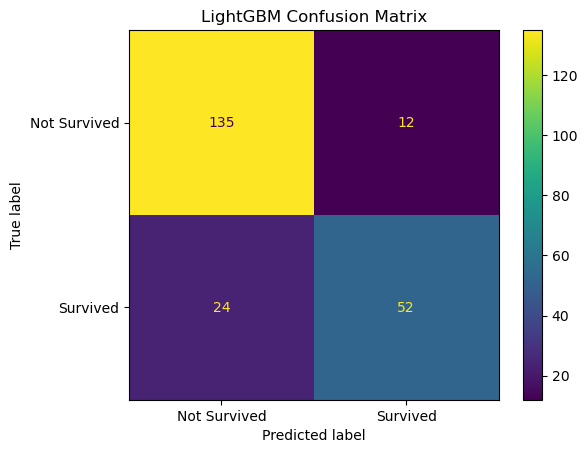

In [510]:
# Confusion matrix for LightGBM
ConfusionMatrixDisplay.from_predictions(y_test, y_predL, display_labels=['Not Survived', 'Survived'])
plt.title('LightGBM Confusion Matrix')
plt.show()

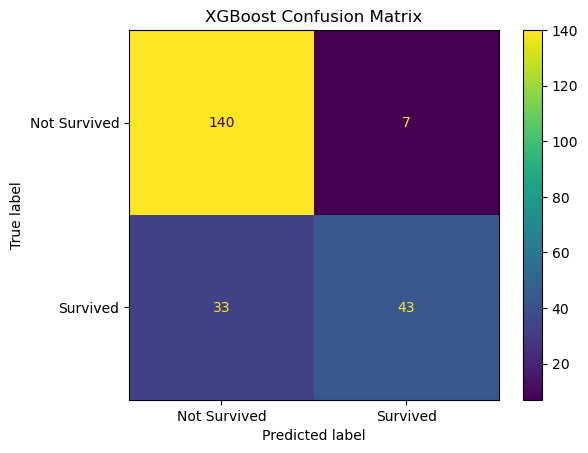

In [512]:
# Confusion matrix for XGBoost
ConfusionMatrixDisplay.from_predictions(y_test, y_predX, display_labels=['Not Survived', 'Survived'])
plt.title('XGBoost Confusion Matrix')
plt.show()

In [ ]:
# This analysis compares the performance of LightGBM and XGBoost models for predicting survival, with the aim of identifying each model's strengths and weaknesses and exploring their practical implications.